In [12]:
import numpy as np
import pandas as pd
import os

work_dir = "./input"

work_dir

'./input'

In [13]:
%matplotlib inline

In [14]:
images = os.listdir(work_dir)

In [28]:
len(images)

76

Using cache found in C:\Users\TIMING.KZ/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-7-2 Python-3.13.4 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
C:\Users\TIMING.KZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 600x499 2 Petroglyphs
Speed: 8.8ms pre-process, 7.0ms inference, 105.8ms NMS per image at shape (1, 3, 640, 544)


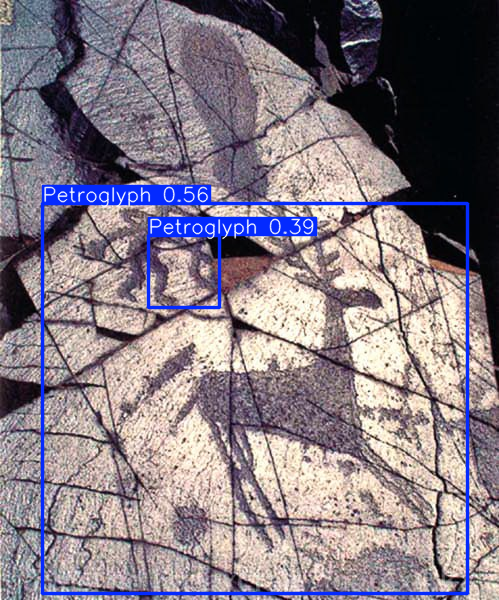

tensor([[4.25497e+01, 2.03642e+02, 4.67081e+02, 5.93534e+02, 5.56609e-01, 0.00000e+00],
        [1.48068e+02, 2.35378e+02, 2.19293e+02, 3.07682e+02, 3.92464e-01, 0.00000e+00]], device='cuda:0')


In [24]:
import torch
import pathlib
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

pathlib.PosixPath = pathlib.Path

# Load model from YOLOv5 repo (not Ultralytics YOLOv8)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='model/last.pt')
model.eval()

# Load and preprocess image
img_path = "./input/" + images[70]
image = cv2.imread(img_path)
results = model(img_path)  # You can also use numpy arrays

# Show results
results.print()
results.show()  # Opens image with detections

# Or access raw results
preds = results.pred[0]  # (n, 6): x1, y1, x2, y2, conf, cls
print(preds)


In [25]:
crops = []

for i, (*xyxy, conf, cls) in enumerate(preds):
    x1, y1, x2, y2 = map(int, xyxy)
    crop = image[y1:y2, x1:x2]
    crops.append(crop)
 
print(f"Cropped {len(preds)} object(s).")

Cropped 2 object(s).


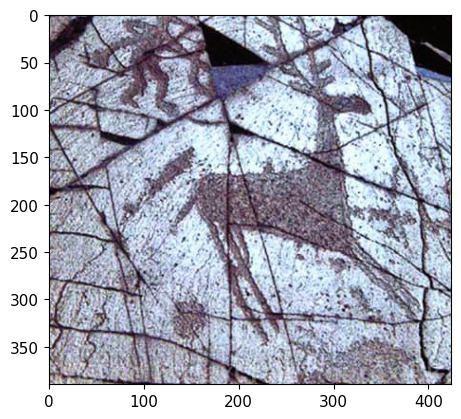

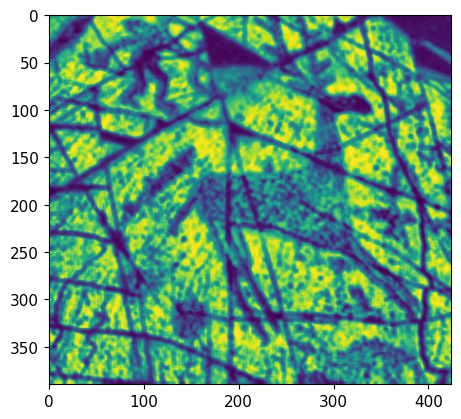

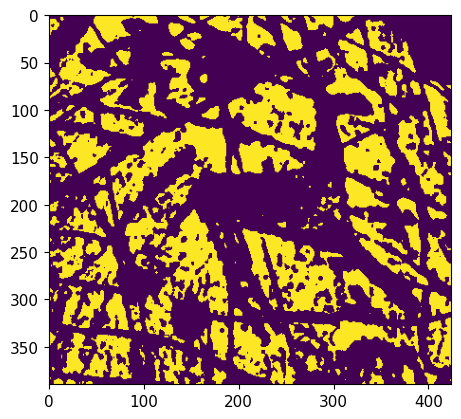

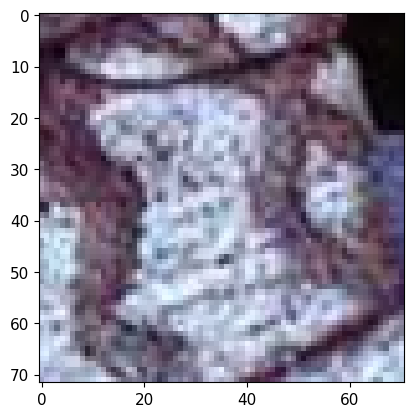

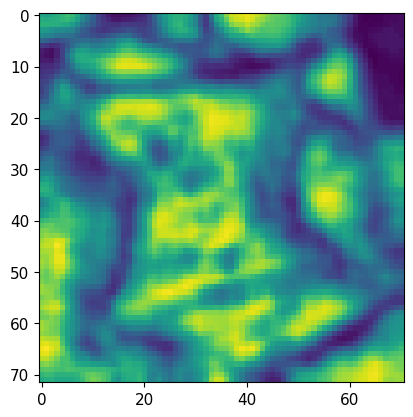

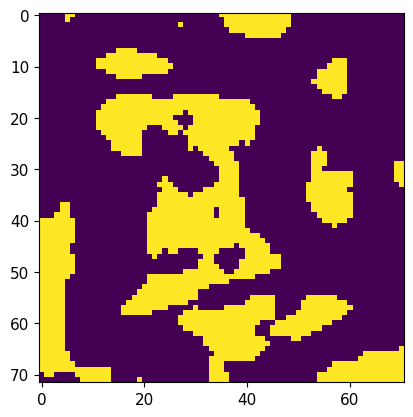

In [27]:
for i, img in enumerate(crops):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    prep = cv2.GaussianBlur(gray, (5, 5), 5)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    prep = clahe.apply(prep)

    _, threshh = cv2.threshold(prep, 170, 255, cv2.THRESH_BINARY)

    plt.imshow(img)
    plt.show()
    plt.imshow(prep)
    plt.show()
    plt.imshow(threshh)
    plt.show()
    
    cv2.imwrite(f'./original/orig{i}.png', img)
    cv2.imwrite(f'./preprocessed/prep{i}.png', prep)
    cv2.imwrite(f'./petroglyphs/petr{i}.png', threshh)

In [ ]:
for i, img in enumerate(images):
    img_path = "./input/" + img
    image = cv2.imread(img_path)

    results = model(img_path)

    preds = results.pred[0]

    crops = []

    for j, (*xyxy, conf, cls) in enumerate(preds):
        x1, y1, x2, y2 = map(int, xyxy)
        crop = image[y1:y2, x1:x2]
        crops.append(crop)
 
    for j, img in enumerate(crops):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        prep = cv2.GaussianBlur(gray, (5, 5), 5)

        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        prep = clahe.apply(prep)

        _, threshh = cv2.threshold(prep, 170, 255, cv2.THRESH_BINARY)
        
        cv2.imwrite(f'./original/orig{i}[{j}].png', img)
        cv2.imwrite(f'./preprocessed/prep{i}[{j}].png', prep)
        cv2.imwrite(f'./petroglyphs/petr{i}[{j}].png', threshh)

C:\Users\TIMING.KZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\TIMING.KZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\TIMING.KZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\TIMING.KZ/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\TIMING.KZ/.cache\torch\hub\ultralytics_